# CSE603: Machine Learning - II

# Final - Project

# Analysis of Statistical Inference Methods vs Traditional ML 

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 31st January 2022

# Sumarizing Results

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

### Importing all the results scores of our 10 datasets

In [2]:
df1=pd.read_csv('df_results_r1-f.csv')
df2=pd.read_csv('df_results_r2.csv')
df3=pd.read_csv('df_results_r3-f.csv')
df4=pd.read_csv('df_results_r4.csv')
df5=pd.read_csv('df_results_r5.csv')

df6=pd.read_csv('df_results_c1.csv')
df7=pd.read_csv('df_results_c2.csv')
df8=pd.read_csv('df_results_c3.csv')
df9=pd.read_csv('df_results_c4.csv')
df10=pd.read_csv('df_results_c5.csv')

In [3]:
df10

,model_name,sampling/VI_method,Accuracy_train,AUC-ROC_train,Accuracy_test,AUC-ROC_test,model_details
0,Logistic Regression-tain/test dataste,NaN,0.850893,0.922149,0.812500,0.906693,LogisticRegression()
1,Logistic Regression-tain/test dataste,NaN,0.850893,0.922149,0.812500,0.906693,LogisticRegression()
2,HMC MLR-standard scalar-train/test datastet (S),HMC,0.837500,0.916844,0.610417,0.897470,<pymc3.model.Model object at 0x7f73c8dba450>
3,metropolis MLR-standard scalar-train/test datastet (S),metropolis,0.817857,0.905174,0.602083,0.868896,<pymc3.model.Model object at 0x7f73becd8150>
4,NUTS MLR-standard scalar-train/test datastet (S),NUTS,0.837500,0.916841,0.600000,0.861536,<pymc3.model.Model object at 0x7f73def85f90>
...,...,...,...,...,...,...,...
7,Logistic Regression-tain/test dataste,Slice,0.840179,0.917997,0.600000,0.766502,<pymc3.model.Model object at 0x7f73bb304750>
8,slice MLR-standard scalar-train/test datastet (S),slice,0.838393,0.917994,0.600000,0.719048,<pymc3.model.Model object at 0x7f73bd626f90>
9,svgd MLR-Robust-Nuts-train/test datastet (G),svgd,0.713393,0.828113,0.675000,0.716408,<pymc3.model.Model object at 0x7f73bef84890>
10,Logistic Regression-tain/test dataste,Slice,0.851786,0.921770,0.600000,0.686098,<pymc3.model.Model object at 0x7f73e44dbe90>


#### Making a dataset to store the combined Max results  f all the methods in a dataset

In [4]:
results_combined=pd.DataFrame(columns=['Linear Regression','Logistic Regression','NUTS','HMC','metropolis','slice',
                              'advi','fullrank_advi','svgd'])
results_combined

,Linear Regression,Logistic Regression,NUTS,HMC,metropolis,slice,advi,fullrank_advi,svgd


In [5]:
mcmc_methods=['NUTS','HMC','metropolis','slice']
vi_method=['advi','fullrank_advi','svgd']

In [6]:
mcmc_methods

['NUTS', 'HMC', 'metropolis', 'slice']

In [7]:
vi_method

['advi', 'fullrank_advi', 'svgd']

In [8]:
data_r=[df1,df2,df3,df4,df5]
data_c=[df6,df7,df8,df9,df10]

#### Making a function to extract all the best results of a method in that dataset for regression datasets

In [9]:


def comined_results_r(datasets):
    
    try:
        a1=datasets[datasets['sampling/VI_method']=='NUTS']
        NUTS=a1['Adj_R2'].max()

        a2=datasets[datasets['sampling/VI_method']=='HMC']
        HMC=a2['Adj_R2'].max()

        a3=datasets[datasets['sampling/VI_method']=='metropolis']
        metropolis=a3['Adj_R2'].max()

        a4=datasets[datasets['sampling/VI_method']=='slice']
        slice=a4['Adj_R2'].max()

        a5=datasets[datasets['sampling/VI_method']=='advi']
        advi=a5['Adj_R2'].max()

        a6=datasets[datasets['sampling/VI_method']=='fullrank_advi']
        fullrank_advi=a6['Adj_R2'].max()

        a7=datasets[datasets['sampling/VI_method']=='svgd']
        svgd=a7['Adj_R2'].max()

        a8=datasets[datasets['model_details']=='LinearRegression()']
        linear_reg=a8['Adj_R2'].max()

        a8=datasets[datasets['model_details']=='LogisticRegression()']
        logistic_reg=a8['Adj_R2'].max()


        print(NUTS,HMC,metropolis,slice,advi,fullrank_advi,svgd,linear_reg,logistic_reg)

        # results_combined=results_combined.append({'Linear Regression':linear_reg,'Logistic Regression':logistic_reg,'NUTS':NUTS,
        #                                       'HMC':HMC,'metropolis':metropolis,'slice':slice, 'advi':advi,
        #                                       'fullrank_advi':fullrank_advi,'svgd':svgd},ignore_index=True)
        global results_combined
        

        row = pd.Series({'Linear Regression':linear_reg,'Logistic Regression':logistic_reg,'NUTS':NUTS,
                                            'HMC':HMC,'metropolis':metropolis,'slice':slice, 'advi':advi,
                                            'fullrank_advi':fullrank_advi,'svgd':svgd},name='regression-dataset-'+str(i+1))

        results_combined=results_combined.append(row)

        results_combined
        
        
    except:
        print(i+1)

#### Making a function to extract all the best results of a method in that dataset for Classification datasets

In [10]:


def comined_results_c(datasets):
    
    try:
        a1=datasets[datasets['sampling/VI_method']=='NUTS']
        NUTS=a1['AUC-ROC_test'].max()

        a2=datasets[datasets['sampling/VI_method']=='HMC']
        HMC=a2['AUC-ROC_test'].max()

        a3=datasets[datasets['sampling/VI_method']=='metropolis']
        metropolis=a3['AUC-ROC_test'].max()

        a4=datasets[datasets['sampling/VI_method']=='slice']
        slice=a4['AUC-ROC_test'].max()

        a5=datasets[datasets['sampling/VI_method']=='advi']
        advi=a5['AUC-ROC_test'].max()

        a6=datasets[datasets['sampling/VI_method']=='fullrank_advi']
        fullrank_advi=a6['AUC-ROC_test'].max()

        a7=datasets[datasets['sampling/VI_method']=='svgd']
        svgd=a7['AUC-ROC_test'].max()

        a8=datasets[datasets['model_details']=='LinearRegression()']
        linear_reg=a8['AUC-ROC_test'].max()

        a8=datasets[datasets['model_details']=='LogisticRegression()']
        logistic_reg=a8['AUC-ROC_test'].max()


        print(NUTS,HMC,metropolis,slice,advi,fullrank_advi,svgd,linear_reg,logistic_reg)

        # results_combined=results_combined.append({'Linear Regression':linear_reg,'Logistic Regression':logistic_reg,'NUTS':NUTS,
        #                                       'HMC':HMC,'metropolis':metropolis,'slice':slice, 'advi':advi,
        #                                       'fullrank_advi':fullrank_advi,'svgd':svgd},ignore_index=True)
        global results_combined
        

        row = pd.Series({'Linear Regression':linear_reg,'Logistic Regression':logistic_reg,'NUTS':NUTS,
                                            'HMC':HMC,'metropolis':metropolis,'slice':slice, 'advi':advi,
                                            'fullrank_advi':fullrank_advi,'svgd':svgd},name='classification-dataset-'+str(i+1))

        results_combined=results_combined.append(row)

        results_combined
        
    except:
        print(i+1)

#### Running a loop to get all the best results from the datasets (Results based on ADJ-R2 and AUC-ROC)

In [11]:
for i,j in enumerate(data_r):
    # print(i)
    comined_results_r(j)
    
for i,j in enumerate(data_c):
    # print(i)
    comined_results_c(j)

0.4663762689240264 0.4663574151357746 0.4502897556017164 0.4664807571319062 -0.3054539945882588 0.1271819597988257 0.3159424112201237 0.4655118404071251 nan
0.7406446956220796 0.7404599468464731 0.7405791296627926 0.7405018333056024 0.752521790652457 0.7377259756332555 0.740372439167821 0.7419097779617976 nan
0.963493429085432 0.963481760677666 0.9635667524401575 0.9635168630344496 0.950980293812308 0.964138402363005 0.9633906079299492 0.963517710251066 nan
0.4554856732109074 0.4555083750964293 0.4551811151484201 0.4555913228370107 0.4542363935853225 0.4576556904631932 0.4545011579415818 0.4553773671564801 nan
0.6312014363020385 0.6309467623627029 0.6307303418132966 0.6311281331162681 0.5800006910287203 0.6292869762815392 0.6316237696842049 0.6311033375903115 nan
0.5 0.5 0.5 0.5 0.5 0.5 0.5 nan 0.7799475371611775
0.9619392440833628 0.9617626280466268 0.9613505239609088 0.9610414458966208 0.9593194395384436 0.9615712940068292 0.9623366301660192 nan 0.961438831979277
0.9995017438963628 0

In [12]:
results_combined

,Linear Regression,Logistic Regression,NUTS,HMC,metropolis,slice,advi,fullrank_advi,svgd
regression-dataset-1,0.465512,NaN,0.466376,0.466357,0.450290,0.466481,-0.305454,0.127182,0.315942
regression-dataset-2,0.741910,NaN,0.740645,0.740460,0.740579,0.740502,0.752522,0.737726,0.740372
regression-dataset-3,0.963518,NaN,0.963493,0.963482,0.963567,0.963517,0.950980,0.964138,0.963391
regression-dataset-4,0.455377,NaN,0.455486,0.455508,0.455181,0.455591,0.454236,0.457656,0.454501
regression-dataset-5,0.631103,NaN,0.631201,0.630947,0.630730,0.631128,0.580001,0.629287,0.631624
classification-dataset-1,NaN,0.779948,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
classification-dataset-2,NaN,0.961439,0.961939,0.961763,0.961351,0.961041,0.959319,0.961571,0.962337
classification-dataset-3,NaN,0.999573,0.999502,0.999573,0.956818,0.820746,0.998173,0.999549,0.999525
classification-dataset-4,NaN,0.776719,0.750419,0.748878,0.733667,0.695708,0.693062,0.706563,0.729345
classification-dataset-5,NaN,0.906693,0.861536,0.897470,0.868896,0.719048,0.833758,0.645408,0.716408


Each row in The table above shows the best result of a mthod like (NUTS, HHMC) for that dataset

In [13]:
results=results_combined.copy()

#### NOw adding a column to find which method is best for each dataset

In [14]:

results_combined['Best-Result'] = results_combined.idxmax(axis=1)

In [15]:
results_combined

,Linear Regression,Logistic Regression,NUTS,HMC,metropolis,slice,advi,fullrank_advi,svgd,Best-Result
regression-dataset-1,0.465512,NaN,0.466376,0.466357,0.450290,0.466481,-0.305454,0.127182,0.315942,slice
regression-dataset-2,0.741910,NaN,0.740645,0.740460,0.740579,0.740502,0.752522,0.737726,0.740372,advi
regression-dataset-3,0.963518,NaN,0.963493,0.963482,0.963567,0.963517,0.950980,0.964138,0.963391,fullrank_advi
regression-dataset-4,0.455377,NaN,0.455486,0.455508,0.455181,0.455591,0.454236,0.457656,0.454501,fullrank_advi
regression-dataset-5,0.631103,NaN,0.631201,0.630947,0.630730,0.631128,0.580001,0.629287,0.631624,svgd
classification-dataset-1,NaN,0.779948,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,Logistic Regression
classification-dataset-2,NaN,0.961439,0.961939,0.961763,0.961351,0.961041,0.959319,0.961571,0.962337,svgd
classification-dataset-3,NaN,0.999573,0.999502,0.999573,0.956818,0.820746,0.998173,0.999549,0.999525,Logistic Regression
classification-dataset-4,NaN,0.776719,0.750419,0.748878,0.733667,0.695708,0.693062,0.706563,0.729345,Logistic Regression
classification-dataset-5,NaN,0.906693,0.861536,0.897470,0.868896,0.719048,0.833758,0.645408,0.716408,Logistic Regression


<AxesSubplot: >

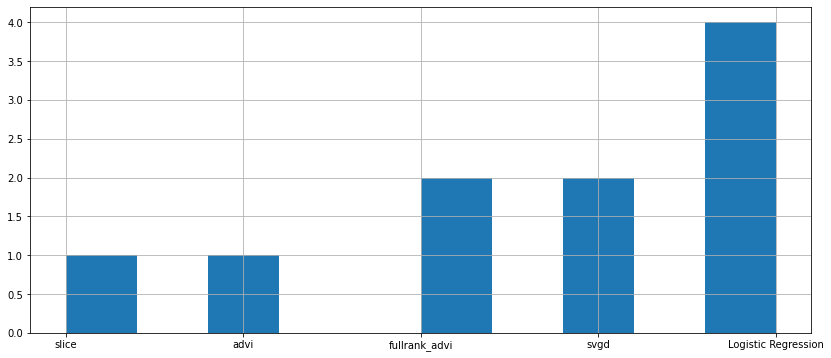

In [16]:
from matplotlib.pyplot import figure
figure(figsize=(14, 6))
results_combined['Best-Result'].hist()

This shows that 2 times SVGD, 2 times full rank-ADVI have performed best

MCMC method slice has performed 1 time better

In classification Logistic regression has performed 4 out of 5 times better

## Making a bar plot for results of all datasets

<AxesSubplot: >

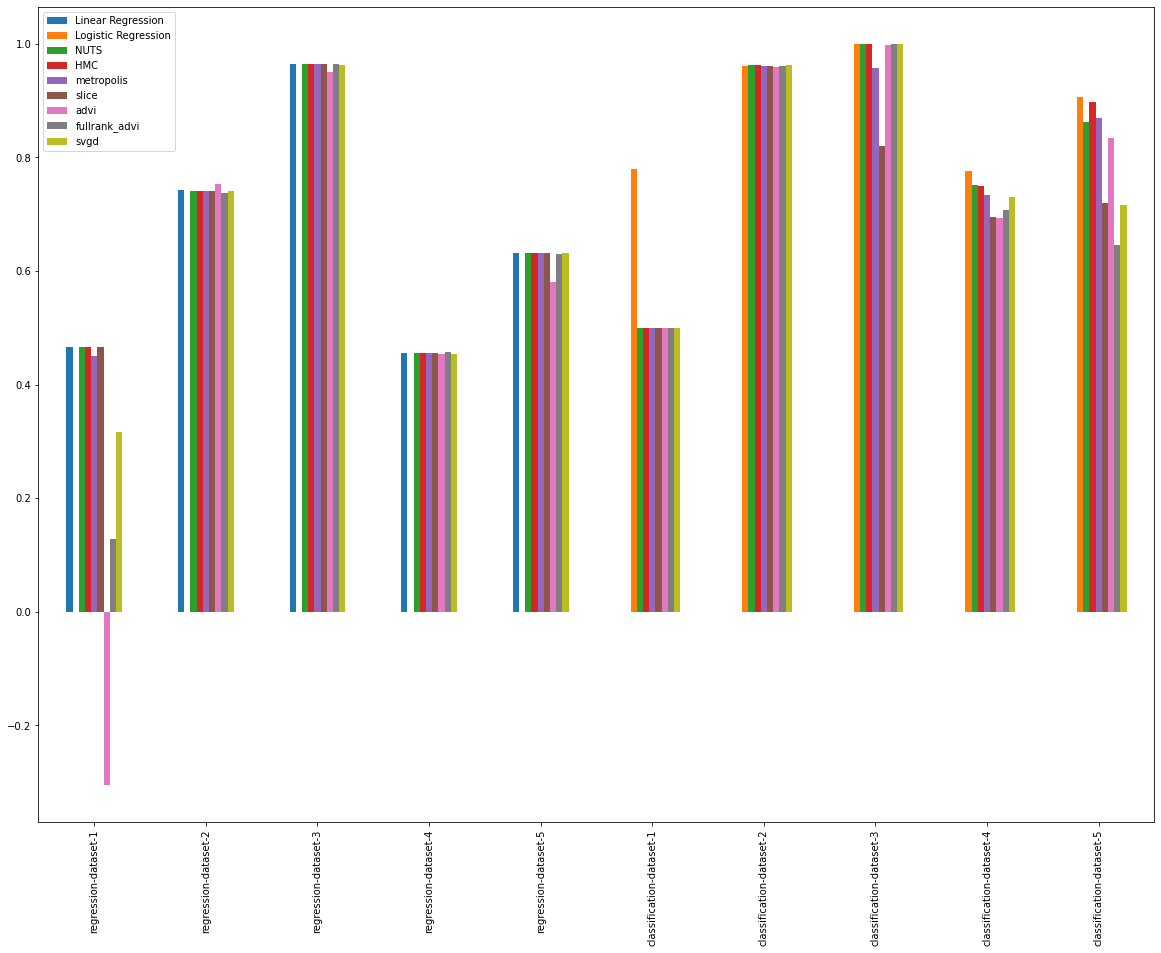

In [17]:
from matplotlib.pyplot import figure
# figure(figsize=(24, 18))
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
# results.plot.bar(ax=ax,subplots=True)
results.plot.bar(ax=ax)

#### This bar plot shows that nearly all models have performed quite similar for a particular dataset

### Making a bar plot for each individual dataset to compare its results

array([<AxesSubplot: title={'center': 'regression-dataset-1'}>,
       <AxesSubplot: title={'center': 'regression-dataset-2'}>,
       <AxesSubplot: title={'center': 'regression-dataset-3'}>,
       <AxesSubplot: title={'center': 'regression-dataset-4'}>,
       <AxesSubplot: title={'center': 'regression-dataset-5'}>,
       <AxesSubplot: title={'center': 'classification-dataset-1'}>,
       <AxesSubplot: title={'center': 'classification-dataset-2'}>,
       <AxesSubplot: title={'center': 'classification-dataset-3'}>,
       <AxesSubplot: title={'center': 'classification-dataset-4'}>,
       <AxesSubplot: title={'center': 'classification-dataset-5'}>],
      dtype=object)

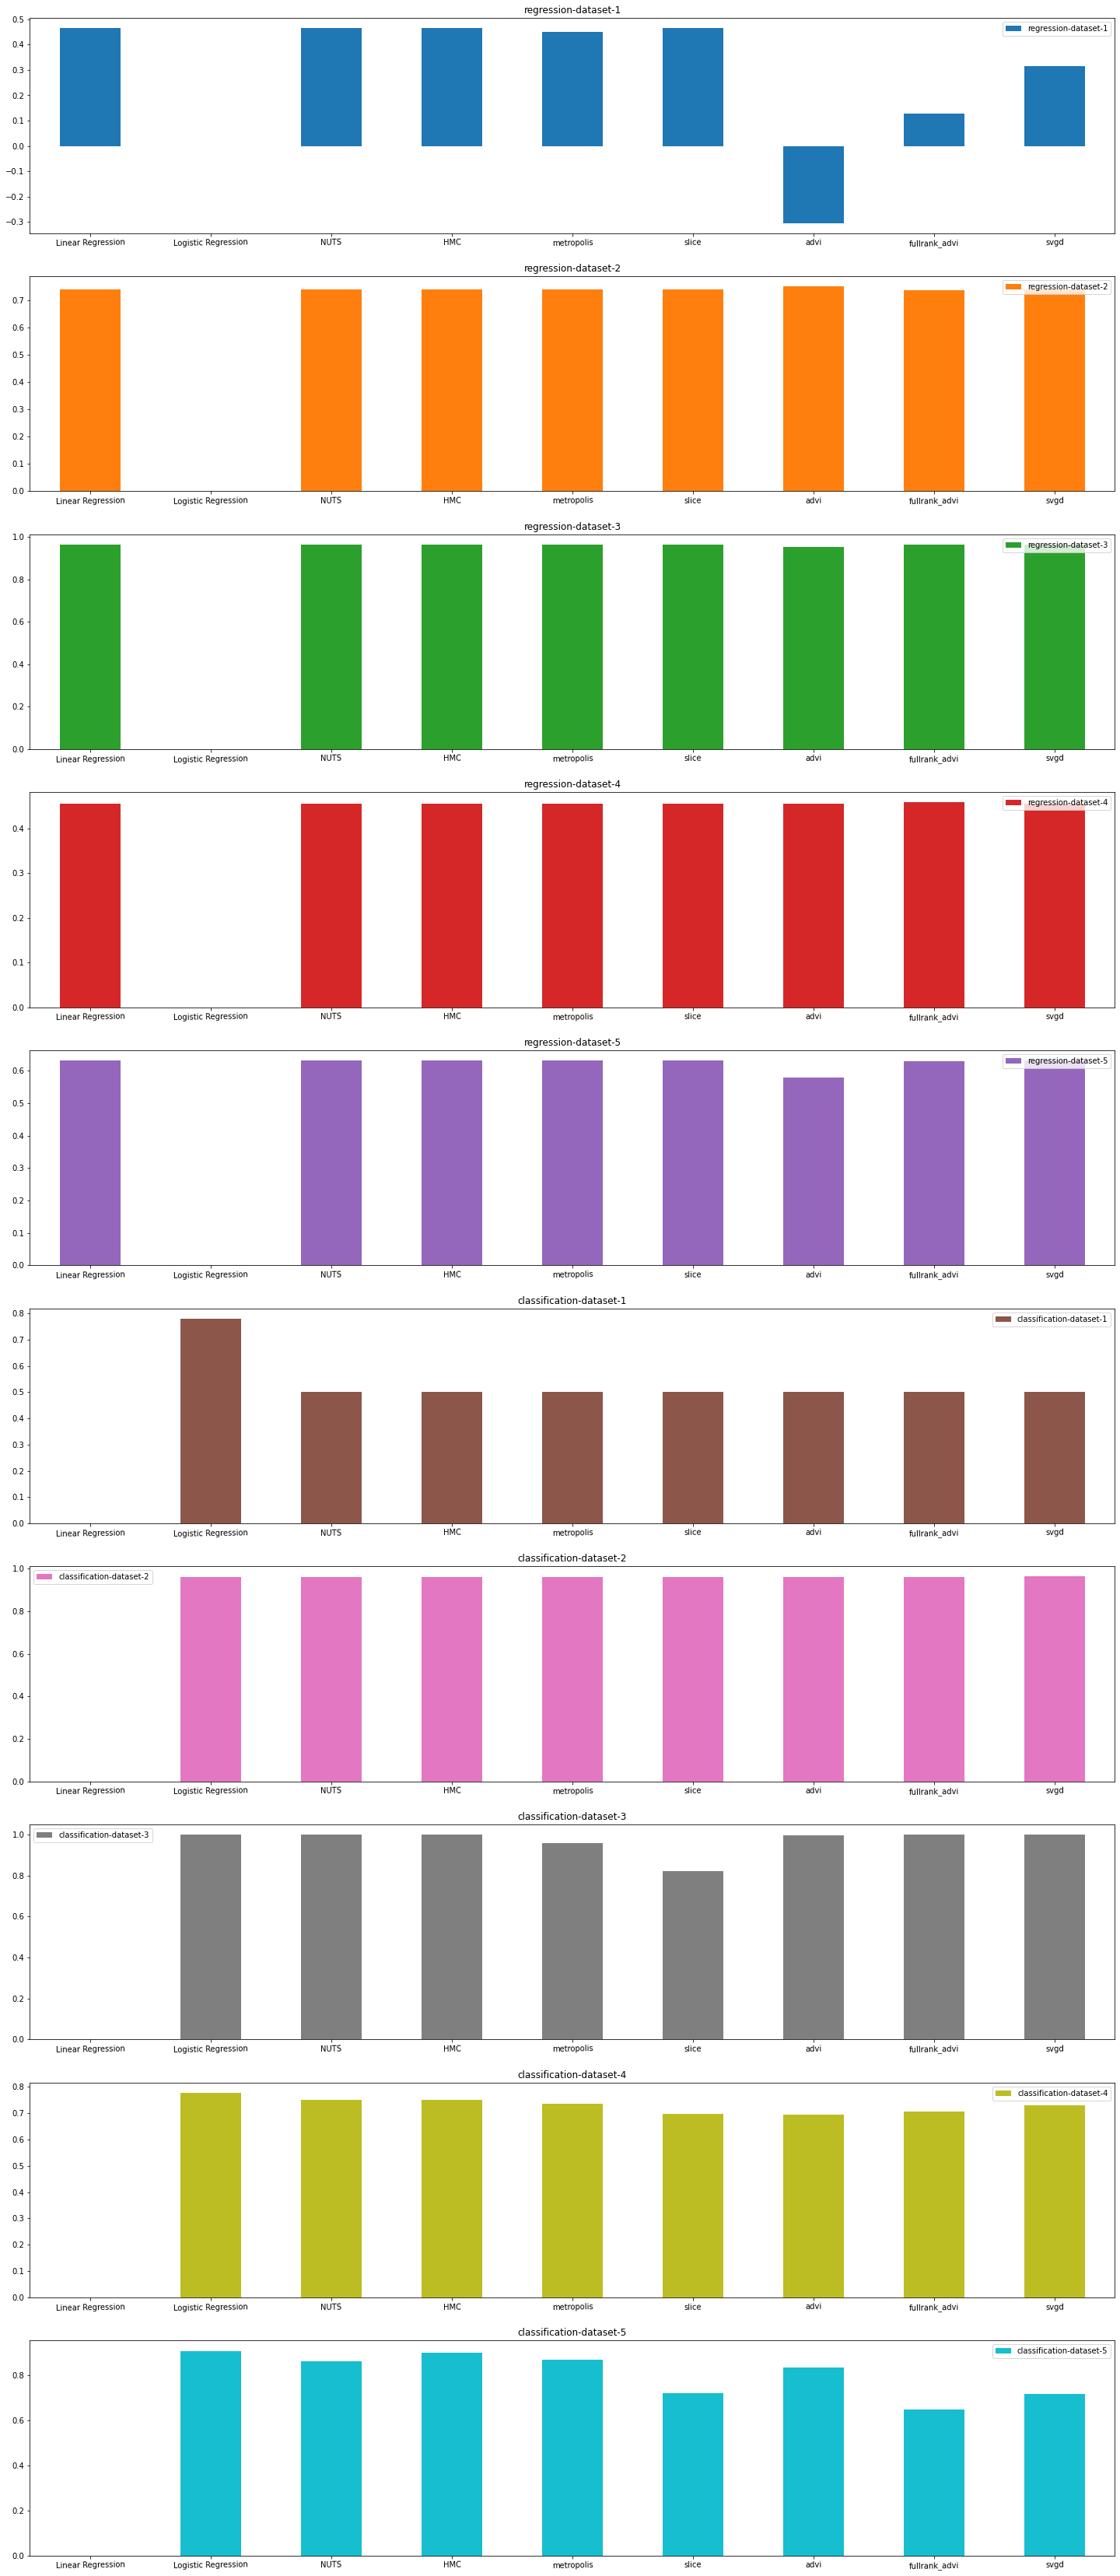

In [18]:
reults_T=results.T
from matplotlib.pyplot import figure
fig = plt.figure(figsize = (25,60))
ax = fig.gca()
reults_T.plot.bar(ax=ax,subplots=True,rot=1)


#### This again shows that all the methods give results close to one another

In [19]:
reults_T

,regression-dataset-1,regression-dataset-2,regression-dataset-3,regression-dataset-4,regression-dataset-5,classification-dataset-1,classification-dataset-2,classification-dataset-3,classification-dataset-4,classification-dataset-5
Linear Regression,0.465512,0.741910,0.963518,0.455377,0.631103,NaN,NaN,NaN,NaN,NaN
Logistic Regression,NaN,NaN,NaN,NaN,NaN,0.779948,0.961439,0.999573,0.776719,0.906693
NUTS,0.466376,0.740645,0.963493,0.455486,0.631201,0.500000,0.961939,0.999502,0.750419,0.861536
HMC,0.466357,0.740460,0.963482,0.455508,0.630947,0.500000,0.961763,0.999573,0.748878,0.897470
metropolis,0.450290,0.740579,0.963567,0.455181,0.630730,0.500000,0.961351,0.956818,0.733667,0.868896
slice,0.466481,0.740502,0.963517,0.455591,0.631128,0.500000,0.961041,0.820746,0.695708,0.719048
advi,-0.305454,0.752522,0.950980,0.454236,0.580001,0.500000,0.959319,0.998173,0.693062,0.833758
fullrank_advi,0.127182,0.737726,0.964138,0.457656,0.629287,0.500000,0.961571,0.999549,0.706563,0.645408
svgd,0.315942,0.740372,0.963391,0.454501,0.631624,0.500000,0.962337,0.999525,0.729345,0.716408


## Making bar plot to show methods which give best scores in dataset

#### regression-dataset-1

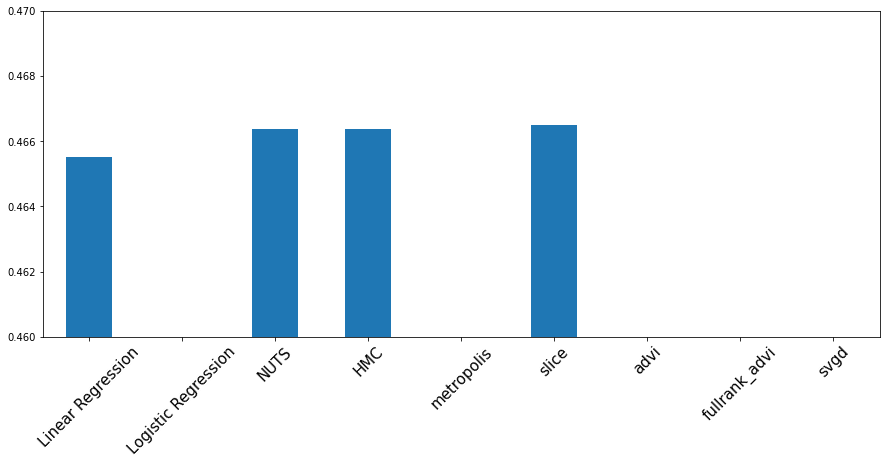

In [20]:
fig = plt.figure(figsize = (15,6))
ax=reults_T['regression-dataset-1'].plot(kind='bar')
plt.xticks(fontsize=15,rotation=45)
ax.set_ylim(0.46,0.47)
plt.show()

for regression dataset 1, Slics HMC NUTS perform even better than Linear regression

#### regression-dataset-2

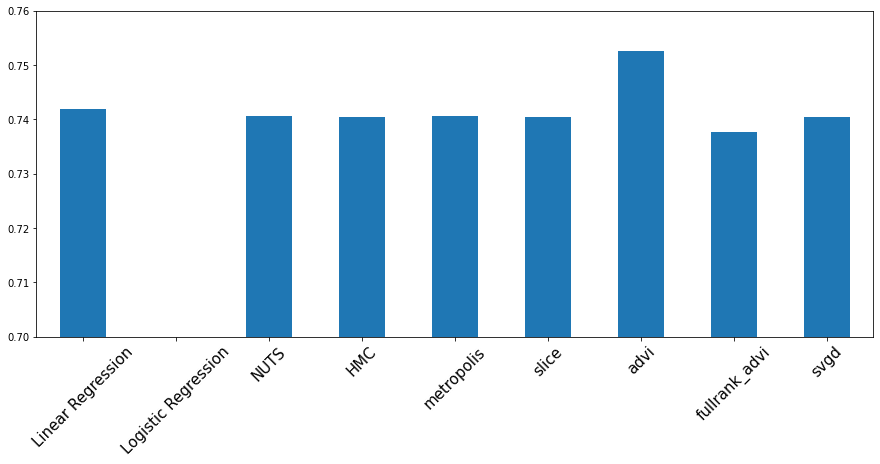

In [21]:
fig = plt.figure(figsize = (15,6))
ax=reults_T['regression-dataset-2'].plot(kind='bar')
plt.xticks(fontsize=15,rotation=45)
ax.set_ylim(0.7,0.76)
plt.show()

for regression dataset-2, ADVI perform best than Slice

#### regression-dataset-3

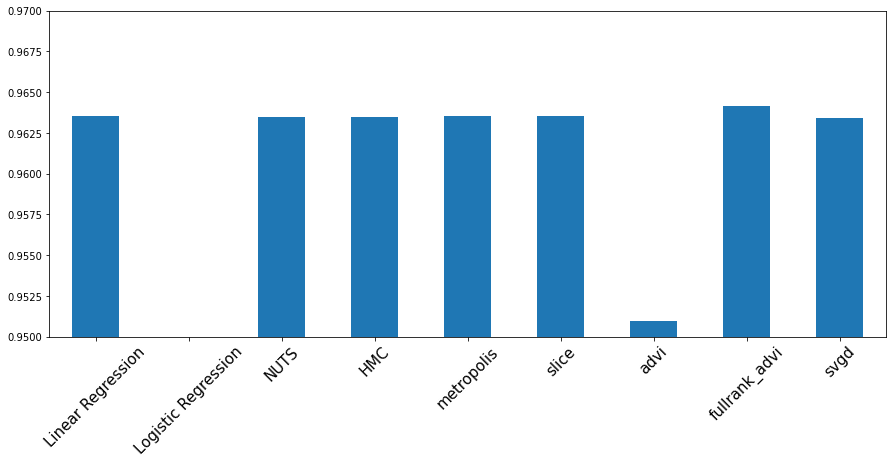

In [22]:
fig = plt.figure(figsize = (15,6))
ax=reults_T['regression-dataset-3'].plot(kind='bar')
plt.xticks(fontsize=15,rotation=45)
ax.set_ylim(0.95,0.97)
plt.show()

for regression dataset-1, All methods except ADVi perform really close

#### regression-dataset-4

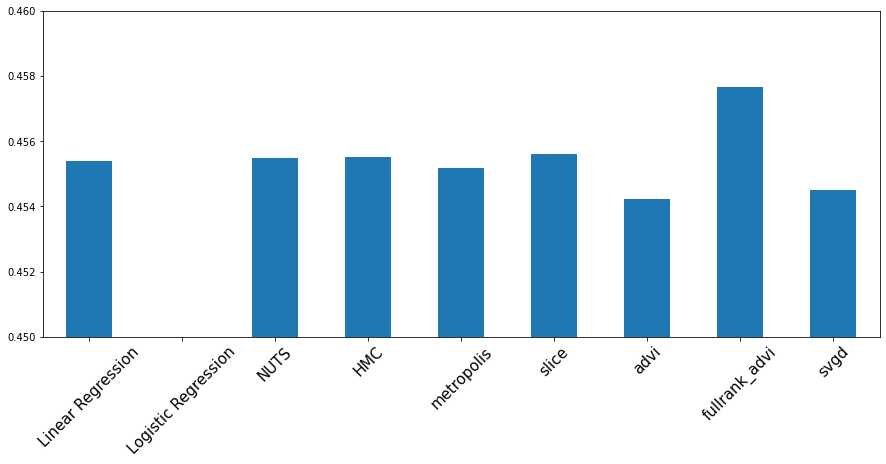

In [23]:
fig = plt.figure(figsize = (15,6))
ax=reults_T['regression-dataset-4'].plot(kind='bar')
plt.xticks(fontsize=15,rotation=45)
ax.set_ylim(0.45,0.46)
plt.show()

for regression dataset-4 full rank advi performs best while Slice and HMC are also good

#### regression-dataset-5

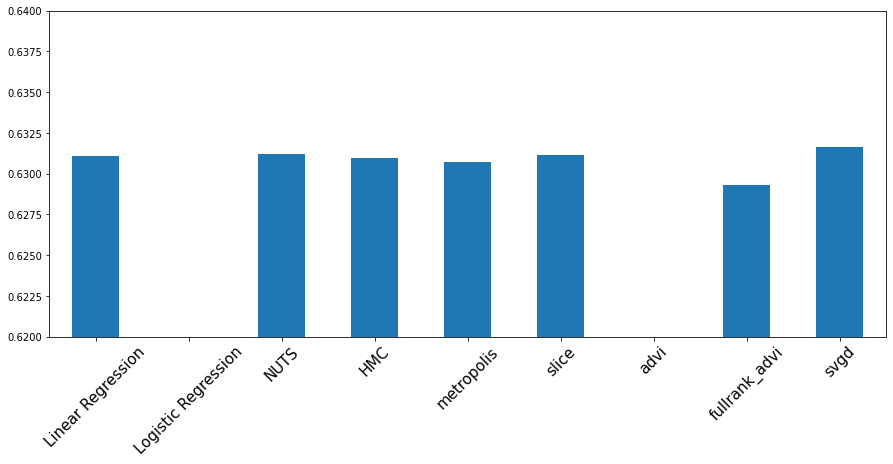

In [24]:
fig = plt.figure(figsize = (15,6))
ax=reults_T['regression-dataset-5'].plot(kind='bar')
plt.xticks(fontsize=15,rotation=45)
ax.set_ylim(0.62,0.64)
plt.show()

for regression dataset-5 all methods perform nearlly equally good

In [25]:
results_combined

,Linear Regression,Logistic Regression,NUTS,HMC,metropolis,slice,advi,fullrank_advi,svgd,Best-Result
regression-dataset-1,0.465512,NaN,0.466376,0.466357,0.450290,0.466481,-0.305454,0.127182,0.315942,slice
regression-dataset-2,0.741910,NaN,0.740645,0.740460,0.740579,0.740502,0.752522,0.737726,0.740372,advi
regression-dataset-3,0.963518,NaN,0.963493,0.963482,0.963567,0.963517,0.950980,0.964138,0.963391,fullrank_advi
regression-dataset-4,0.455377,NaN,0.455486,0.455508,0.455181,0.455591,0.454236,0.457656,0.454501,fullrank_advi
regression-dataset-5,0.631103,NaN,0.631201,0.630947,0.630730,0.631128,0.580001,0.629287,0.631624,svgd
classification-dataset-1,NaN,0.779948,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,Logistic Regression
classification-dataset-2,NaN,0.961439,0.961939,0.961763,0.961351,0.961041,0.959319,0.961571,0.962337,svgd
classification-dataset-3,NaN,0.999573,0.999502,0.999573,0.956818,0.820746,0.998173,0.999549,0.999525,Logistic Regression
classification-dataset-4,NaN,0.776719,0.750419,0.748878,0.733667,0.695708,0.693062,0.706563,0.729345,Logistic Regression
classification-dataset-5,NaN,0.906693,0.861536,0.897470,0.868896,0.719048,0.833758,0.645408,0.716408,Logistic Regression


#### Regression datastes conclusions :

VI methods have perfomred just a little better

The results of most of methods is close to each other

#### classification-dataset-1

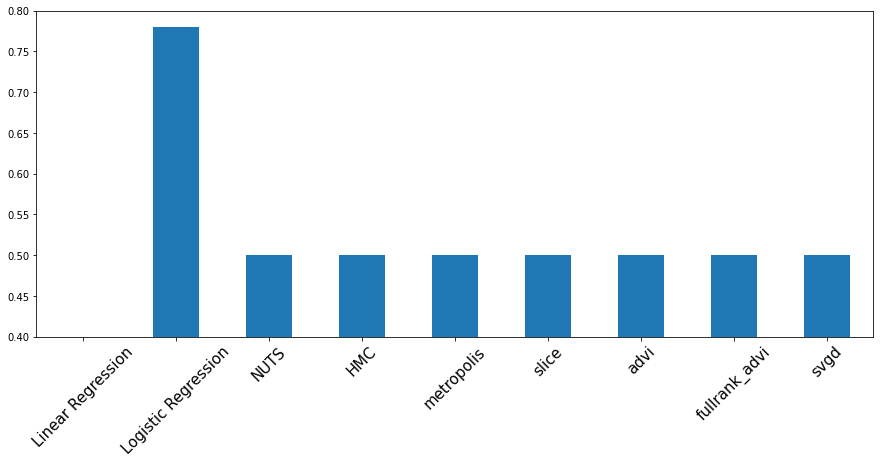

In [26]:
fig = plt.figure(figsize = (15,6))
ax=reults_T['classification-dataset-1'].plot(kind='bar')
plt.xticks(fontsize=15,rotation=45)
ax.set_ylim(0.4,0.8)
plt.show()

for classification dataset-1 logistric regression performs best rest methods perform bad

#### classification-dataset-2

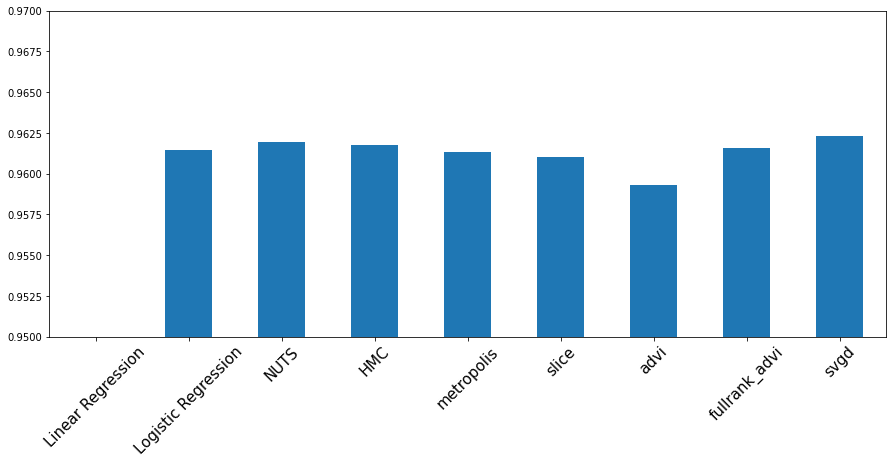

In [27]:
fig = plt.figure(figsize = (15,6))
ax=reults_T['classification-dataset-2'].plot(kind='bar')
plt.xticks(fontsize=15,rotation=45)
ax.set_ylim(0.95,0.97)
plt.show()

for classification dataset-2 SVGD performs best while NUTS seem 2nd best

#### classification-dataset-3

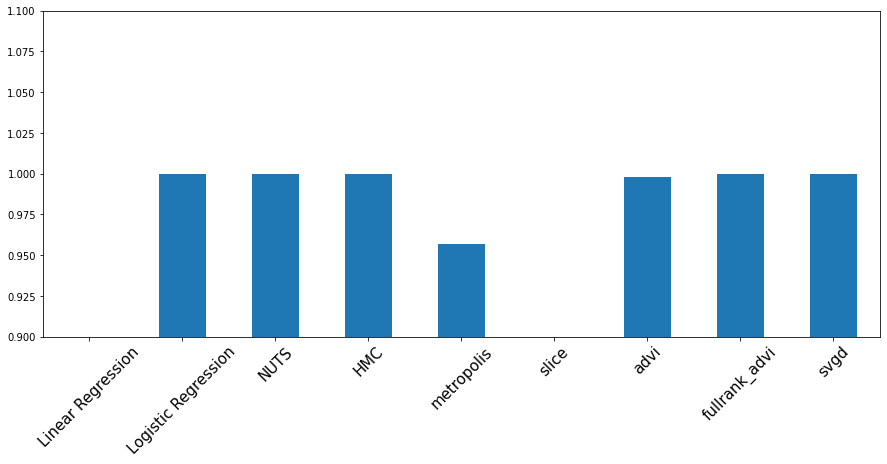

In [28]:
fig = plt.figure(figsize = (15,6))
ax=reults_T['classification-dataset-3'].plot(kind='bar')
plt.xticks(fontsize=15,rotation=45)
ax.set_ylim(0.9,1.1)
plt.show()

for classification dataset-3 nearly all methods perfomr very good

#### classification-dataset-4

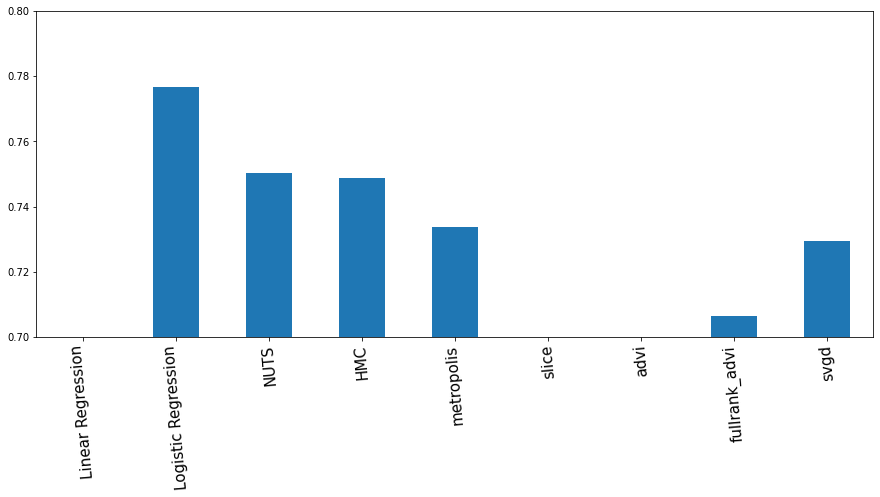

In [29]:
fig = plt.figure(figsize = (15,6))
ax=reults_T['classification-dataset-4'].plot(kind='bar')
plt.xticks(fontsize=15,rotation=95)
ax.set_ylim(0.7,0.8)
plt.show()

for classification dataset-4 NUTS and HMC perform 2nd and 3rd best after logistic regresion

#### classification-dataset-5

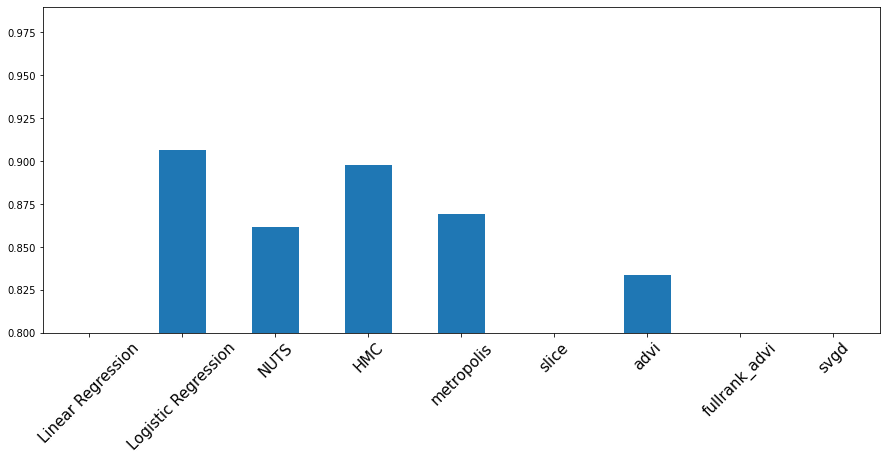

In [30]:
fig = plt.figure(figsize = (15,6))
ax=reults_T['classification-dataset-5'].plot(kind='bar')
plt.xticks(fontsize=15,rotation=45)
ax.set_ylim(0.8,0.99)
plt.show()

for classification dataset-5 HMC perfomrs 2nd best after logistic Regression

#### Classifciation datastes conclusions :
only 2 times logistic regression perfoms best by some margin

The results of most of methods is close to each other

In [31]:
results.to_csv('results-c.csv',index=True)

In [32]:
reults_T.to_csv('results-combined-datasets.csv',index=True)

In [33]:
results_combined.to_csv('results-combined.csv',index=True)

# Conclusions:

## Regression Datasets

following points can be conclude:

1) The reusults of MCMC and VI methods is close
2) VI methods perform slightly better than MCMC
3) The VI and MCMC methods reults ar at par and even better compared with Linear regression

## Classification Datasets

following points can be conclude:

1) Overall the reusults of MCMC and VI methods are in close range
2) The VI and MCMC methods reults are sometimes a bit less than logistic regression
3) only 2 times logistic regression perfoms best by some margin

#### The best results were obatined on Standard scalar dataste with their specified (general) priors of mean = 0 and standard deviation =1

# Final Conclusion

#### Overall the statistical bayesian methods have performed at par and better than the normal ML (frequentist) methods